In [301]:
import numpy as np
import matplotlib.pyplot as plt
import random 
import csv
import pandas as pd
from sklearn.utils import shuffle
import seaborn as sns


In [302]:
### LECTURE DU FICHIER ###
inquiry_data = pd.read_csv('inquiry_prediction_dataset.csv') #On importe le fichier csv 

In [303]:
### MODELISATION ####

In [304]:
# On regarde les colonnes 
inquiry_data.columns

Index(['Unnamed: 0', 'inquiry_id', 'status', 'listing_id', 'country',
       'created_at', 'responded_at', 'start_date', 'end_date', 'duration',
       'total_price', 'nbr_messages_by_owner', 'nbr_messages_by_renter',
       'nbr_messages_by_admin'],
      dtype='object')

In [305]:
#On selectionne la Prediction Target
y = inquiry_data.status

In [306]:
#On choisit les features 
inquiry_features = ['duration', 'total_price', 'nbr_messages_by_owner', 'nbr_messages_by_renter', 'nbr_messages_by_admin' ]
#Par convention on appelle les features X 
X = inquiry_data[inquiry_features]
X.head()

,duration,total_price,nbr_messages_by_owner,nbr_messages_by_renter,nbr_messages_by_admin
0,30,18000.0,1,2,2
1,14,4885.0,7,8,2
2,4,12000.0,18,14,14
3,30,24000.0,1,1,1
4,7,4114.0,1,0,1


In [307]:
## RANDOM FOREST 

In [308]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.cross_validation import train_test_split

X,y= shuffle(X,y) #On mélange les données 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #On split nos données


X, y = make_classification(n_samples=1000, n_features=5,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)

classifieur = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
classifieur.fit(X_train, y_train)
#On fait nos predictions 
yPrediction = classifieur.predict(X_test)
#On regarde notre precision

precision = classifieur.score(X_test, y_test)

print('Précision de notre classifieur sur lensemble de test = ' , precision*100, '%')

Précision de notre classifieur sur lensemble de test =  94.1340782122905 %


In [309]:
#Pour une meilleure validation du modèle, et comme l'algo met très peu de temps à tourner
#On peut faire une cross validation 

In [310]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

#On réalise la cross validation 
kfold = model_selection.KFold(n_splits=8, random_state=7)
results = model_selection.cross_val_score(classifieur, X_train, y_train, cv=kfold, scoring='accuracy')
pred = results.mean()
print("8-fold cross validation précision moyenne =" , pred*100, '%')

8-fold cross validation précision moyenne = 93.69762569832403 %


Feature ranking:
0. feature 3 (0.456941)
1. feature 2 (0.418167)
2. feature 4 (0.072521)
3. feature 1 (0.030974)
4. feature 0 (0.021396)


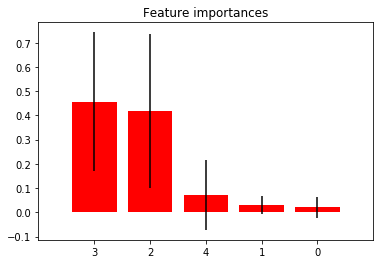

In [311]:
#feature ranking

importances = classifieur.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifieur.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f , indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [313]:
### XG BOOST ###

In [314]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cross_validation import train_test_split

X,y= shuffle(X,y) #On mélange les données 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) #On split nos données


my_model = GradientBoostingClassifier(n_estimators=20)
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(X_train, y_train)
# make predictions
predictions = my_model.predict(X_test)
#On regarde notre precision
precision = my_model.score(X_test, y_test)

print('Précision de notre classifieur sur lensemble de test = ' , precision*100, '%')

Précision de notre classifieur sur lensemble de test =  97.0 %


In [315]:
#Pour une meilleure validation du modèle, et comme l'algo met très peu de temps à tourner
#On peut faire une cross validation 

In [316]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

#On réalise la cross validation 
kfold = model_selection.KFold(n_splits=8, random_state=7)
results = model_selection.cross_val_score(my_model, X_train, y_train, cv=kfold, scoring='accuracy')
pred = results.mean()
print("8-fold cross validation précision moyenne =" , pred*100, '%')

8-fold cross validation précision moyenne = 95.14269853709509 %


In [317]:
### PERFORMANCE ####

In [318]:
from sklearn.metrics import confusion_matrix

In [319]:
#Matrice de confusion 
confusion_matrix = confusion_matrix(y_test, predictions)
print(confusion_matrix)

[[136   4]
 [  5 155]]


In [320]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.96      0.97      0.97       140
          1       0.97      0.97      0.97       160

avg / total       0.97      0.97      0.97       300



In [321]:
### ROC ###

AUC: 0.029910714285714284


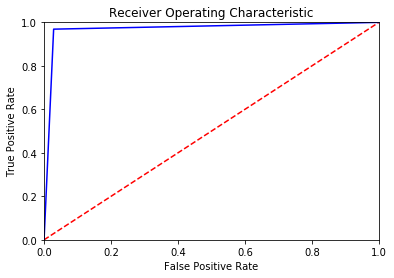

In [324]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

y_true = y_test
y_probas = predictions
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_probas, pos_label=0)

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

# Print ROC curve
plt.title('Receiver Operating Characteristic')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot([0, 1], [0, 1],'r--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot(tpr,fpr,'b', label = 'AUC = %0.2f' % auc)
plt.show() 

